Project5: Big Market Sales Prediction

Import required dependencies

In [ ]:
import numpy as np
import pandas as pd


Loading the dataset

In [ ]:
BM_dataset_train=pd.read_csv("/content/Train.csv")
BM_test_data=pd.read_csv("/content/Test.csv")

Analysing the Dataset


In [ ]:
BM_test_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Checking for NUll Values

In [ ]:
BM_dataset_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
BM_test_data.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Identifying  the Categorical data
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

Data Handling (Handle missing values in the dataset)
- Mean --> Numerical values
- Mode --> String type values

In [ ]:
#finding the mean for the Item_Weight columns
mean_train_iw=BM_dataset_train["Item_Weight"].mean()
mean_test_iw=BM_test_data["Item_Weight"].mean()
print(mean_train_iw)
print(mean_test_iw)

12.857645184135976
12.695633368756642


In [ ]:
#replacing the null values in the dataset to the mean values , by the used of '.fillna()'
BM_dataset_train["Item_Weight"].fillna(mean_train_iw,inplace=True)
BM_test_data["Item_Weight"].fillna(mean_test_iw,inplace=True)

In [ ]:
BM_dataset_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
BM_test_data.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
# finding the mode of the Outlet_Size
mode_os=BM_dataset_train["Outlet_Size"].mode()

In [ ]:
print(mode_os)

0    Medium
Name: Outlet_Size, dtype: object


0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
#replacing the mode value in the dayaset
BM_dataset_train["Outlet_Size"].fillna(mode_os[0],inplace=True)
BM_test_data["Outlet_Size"].fillna(mode_os[0],inplace=True)

In [ ]:
BM_dataset_train


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Check for null values aggain to verifying

In [ ]:
BM_test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Analysing the dataset

In [ ]:
BM_dataset_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features


In [ ]:
import seaborn as sns
sns.set()

<Figure size 600x600 with 0 Axes>

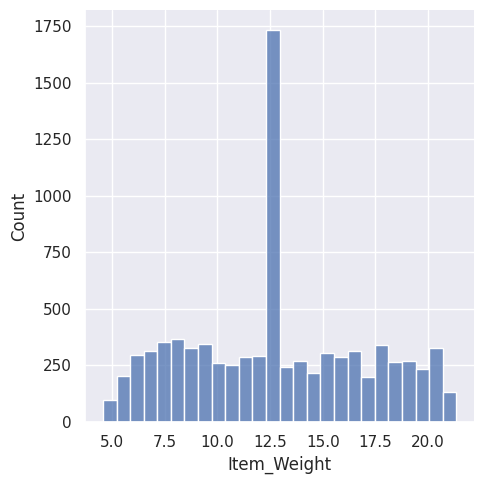

In [ ]:
# Distribution of Item_Weight
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.displot(BM_dataset_train["Item_Weight"])
plt.show()

<Figure size 600x600 with 0 Axes>

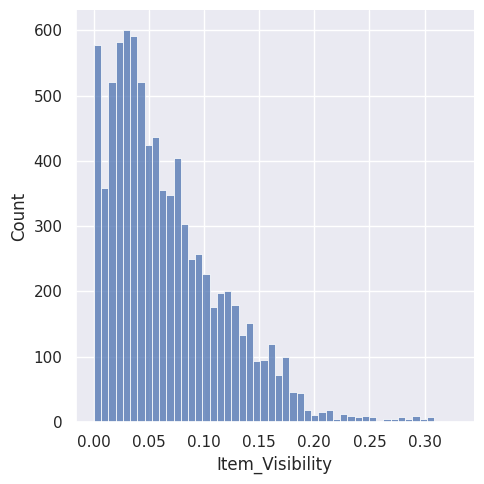

In [ ]:
# Distribution of Item_Visibility
plt.figure(figsize=(6,6))
sns.displot(BM_dataset_train["Item_Visibility"])
plt.show()

<Figure size 600x600 with 0 Axes>

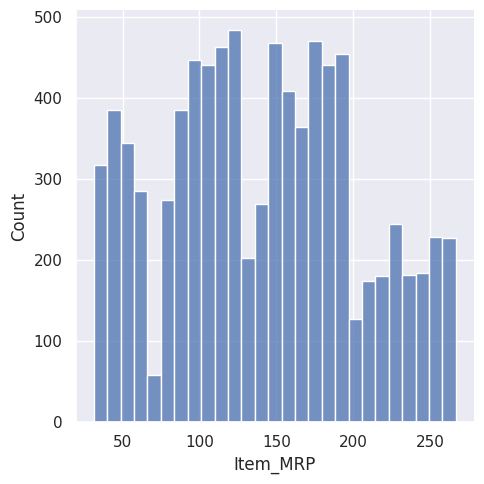

In [ ]:
# Distribution of Item_MRP
plt.figure(figsize=(6,6))
sns.displot(BM_dataset_train["Item_MRP"])
plt.show()

<Figure size 600x600 with 0 Axes>

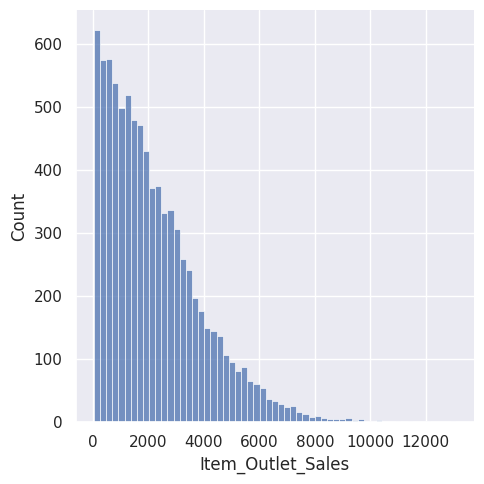

In [ ]:
# Item_Outlet_sales Distribution
plt.figure(figsize=(6,6))
sns.displot(BM_dataset_train["Item_Outlet_Sales"])
plt.show()

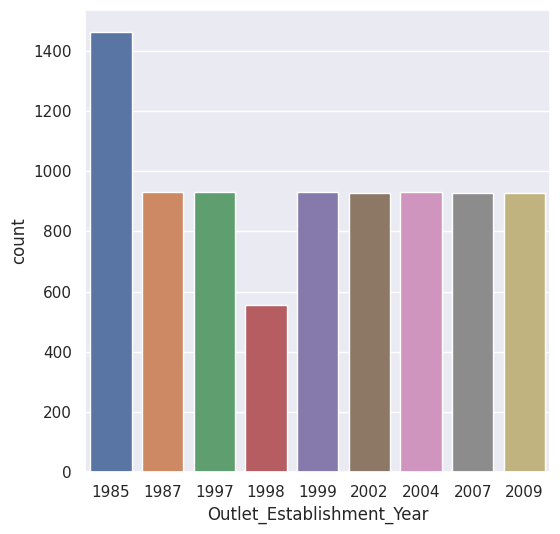

In [ ]:
# Distribution of Outlet_Establishment_year
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year", data=BM_dataset_train)
plt.show()

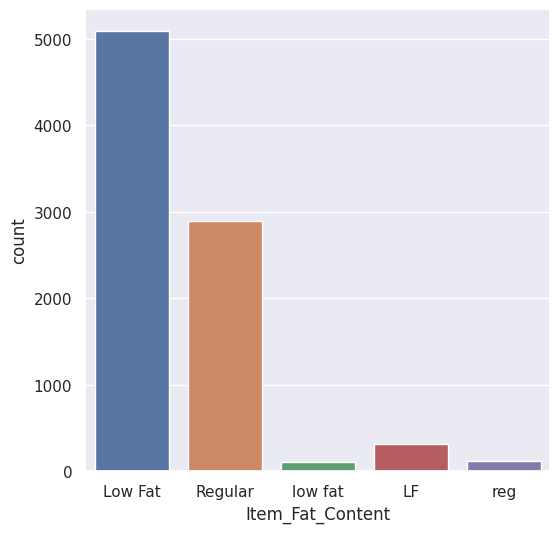

In [ ]:
# Distribution of Item_Fat_Content
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content", data=BM_dataset_train)
plt.show()

data cleaning as the LowFat and low fat and LF are same and so for reg and Regular

In [ ]:
BM_dataset_train.replace({"Item_Fat_Content":{'low fat': 'Low Fat','LF':'Low Fat','reg':'Regular' }},inplace=True)
BM_test_data.replace({"Item_Fat_Content":{'low fat': 'Low Fat','LF':'Low Fat','reg':'Regular' }},inplace=True)

In [ ]:
#Counts the values
BM_dataset_train["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [ ]:
BM_test_data["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

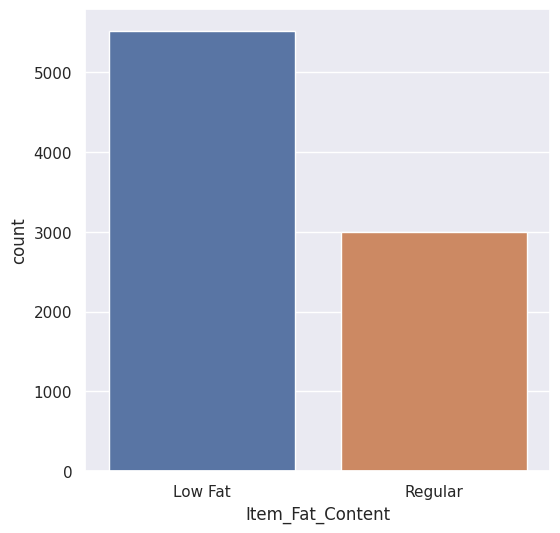

In [ ]:
# Distribution of Item_Fat_content
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",data=BM_dataset_train)
plt.show()

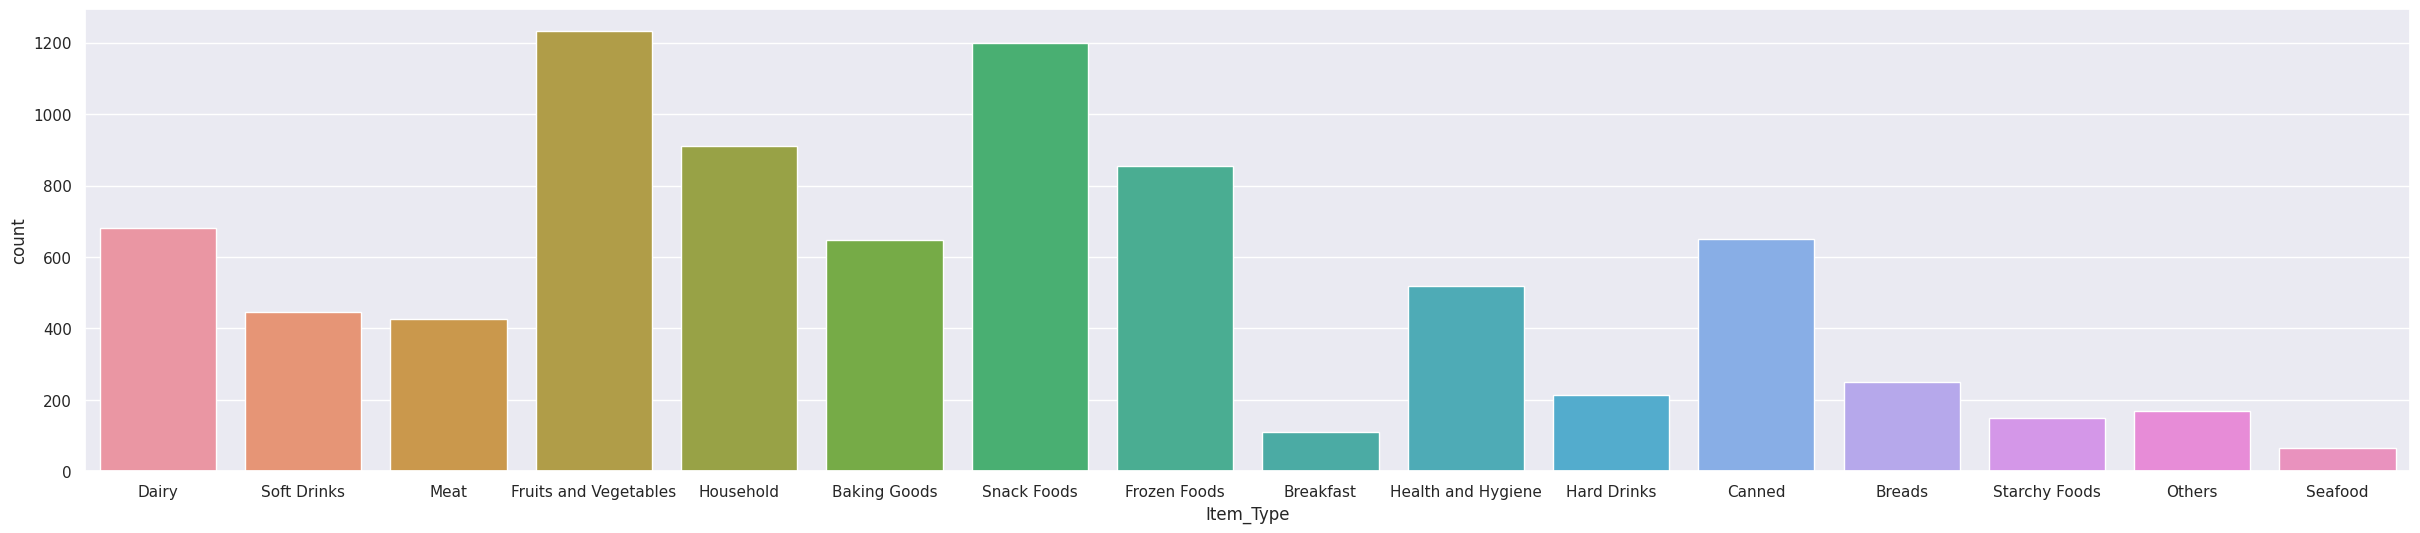

In [ ]:
# Distribution of Item_Type
plt.figure(figsize=(30,6))
sns.countplot(x="Item_Type",data=BM_dataset_train)
plt.show()

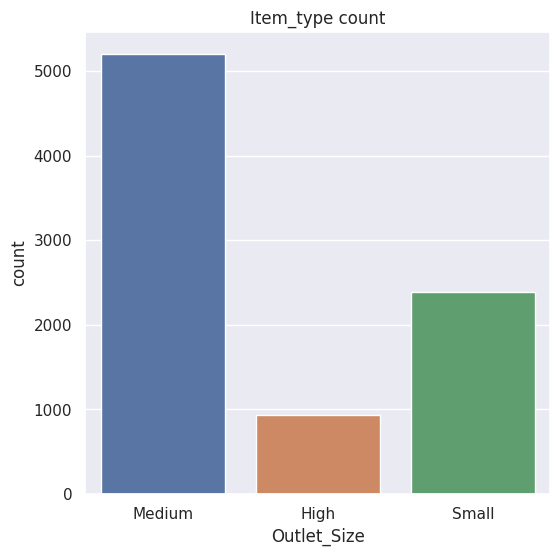

In [ ]:
# Distribution of Outlet_Size
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Size",data=BM_dataset_train)
plt.title("Item_type count")
plt.show()

In [ ]:
BM_dataset_train["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

LABEL ENCODER

In [ ]:
BM_dataset_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [49]:
# import LableEncoder
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()


In [51]:
# Encoding the Categorical values
# Item_Identifier
#  Item_Fat_Content
# - Item_Type
# - Outlet_Identifier
# - Outlet_Size
# - Outlet_Location_Type
# - Outlet_Type
BM_dataset_train["Item_Identifier"]=encoder.fit_transform(BM_dataset_train["Item_Identifier"])

BM_dataset_train["Item_Fat_Content"]=encoder.fit_transform(BM_dataset_train["Item_Fat_Content"])

BM_dataset_train["Item_Type"]=encoder.fit_transform(BM_dataset_train["Item_Type"])

BM_dataset_train["Outlet_Size"]=encoder.fit_transform(BM_dataset_train["Outlet_Size"])

BM_dataset_train["Outlet_Location_Type"]=encoder.fit_transform(BM_dataset_train["Outlet_Location_Type"])

BM_dataset_train["Outlet_Type"]=encoder.fit_transform(BM_dataset_train["Outlet_Type"])

BM_dataset_train["Outlet_Identifier"]=encoder.fit_transform(BM_dataset_train["Outlet_Identifier"])

In [53]:
BM_dataset_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [54]:
BM_test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


ENCODING THE TEST DATASET

In [55]:
BM_test_data["Item_Identifier"]=encoder.fit_transform(BM_test_data["Item_Identifier"])

BM_test_data["Item_Fat_Content"]=encoder.fit_transform(BM_test_data["Item_Fat_Content"])

BM_test_data["Item_Type"]=encoder.fit_transform(BM_test_data["Item_Type"])

BM_test_data["Outlet_Size"]=encoder.fit_transform(BM_test_data["Outlet_Size"])

BM_test_data["Outlet_Location_Type"]=encoder.fit_transform(BM_test_data["Outlet_Location_Type"])

BM_test_data["Outlet_Type"]=encoder.fit_transform(BM_test_data["Outlet_Type"])

BM_test_data["Outlet_Identifier"]=encoder.fit_transform(BM_test_data["Outlet_Identifier"])

In [56]:
BM_test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,1,0.000000,3,214.6218,2,2007,1,1,1


Splitting dataset into INPUT AND OUTPUT dataset

In [58]:
X=BM_dataset_train.drop(["Item_Outlet_Sales"],axis=1)
y=BM_dataset_train["Item_Outlet_Sales"]

In [59]:
print(X)
print(y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

Splitting Model into TRAINING AND TESTING DATA

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

Training Model

**XGBOOST REGRESSION**

In [68]:
from xgboost import XGBRegressor
regressor=XGBRegressor()

Fit the model

In [74]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [105]:
pred_y_train=regressor.predict(X_train)

In [106]:
from sklearn.metrics import r2_score
accuracy_train=r2_score(y_train,pred_y_train)
print(accuracy_train*100,"%")

84.06579223235731 %


In [103]:
# predicting the value on testing value
pred_y_test=regressor.predict(X_test)

In [107]:
# accuracy
accuracy_test=r2_score(y_test,pred_y_test)
print(accuracy_test*100,"%")

84.36757024532959 %


In [108]:
# fit the whole training data
regressor.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [109]:
predict_y_testing=regressor.predict(X)


In [110]:
# r2 acuraccy testing
accuracy_testing=r2_score(y,predict_y_testing)
print(accuracy_testing*100,"%")


84.13390637939186 %
